In [1]:
import pandas as pd
from openPitModel import *
from openPitFunctions import finalBlock
from drawpointFunction  import drawpointFunction
from integratedModel   import setIntegratedModel
from globalFunctions import getNumberOfBlocksInADimension
from plotResults   import plotResults


class Main:
    def __init__(self, path, undergroundDatabaseName, openPitDatabaseName):
        self.path = path
        self.openPitDatabaseName = openPitDatabaseName
        self.undergroundDatabaseName = undergroundDatabaseName
        self.numberOfPeriods = 3

    def execute(self):
        print("Setting MineDatabases")
        self.setMineDatabases(path, self.openPitDatabaseName, self.undergroundDatabaseName)
        print("Setting Open Pit Variables")
        self.setOpenPitVariables()
        print("Setting Underground Variables")
        self.setUndergroundVariables()
        print("Getting Block Information")
        self.getBlockInfo()
        print("Setting Parameters to evaluate")
        self.setParametersToEvaluate()
        print("Setting Global Parameters")
        self.setGlobalParameters()
        print("Getting underground variables")
        self.getUndergroundVariables()
        print("Setting Model")
        self.setModelAndGetResults()
        print("Plotting results")
        plotResults(self.variableValues, self.CA_blocks, self.openPitBlocksLenghtLimits, self.openPitBlocksWidthLimits,
        self.openPitBlocksHeightLimits, self.undergroundBlocksWidthLimits, self.undergroundBlocksHeightLimits)
        #self.getResults(self.model)

    def setMineDatabases(self, path, openPitDatabaseName,undergroundDatabaseName ):
        self.openMineDataframe = pd.read_excel(path+openPitDatabaseName, engine="openpyxl")
        self.undergroundMineDataframe = pd.read_excel(path+undergroundDatabaseName, engine="openpyxl")
    
    def setGlobalParameters(self):
        self.colHeight = 300
        self.securityLevel = 30
        pricePonderator = 1
        mineCostPonderator = 1
        plantCostPonderator = 1
        self.basePrice = 3791.912 * pricePonderator
        self.mineCostPonderator = 1 * mineCostPonderator
        self.basePlantCostPonderator = 1 * plantCostPonderator
        self.setMineLimits()
        self.predecessorBlock = self.setPredecessorBlock()

        self.dif_centroide = self.openPitBlocksLenghtLimits[0]//2 - self.undergroundBlocksLenghtLimits[0]//2
        ZZ = 780
        self.pos_x = 430         
        self.pos_y = 550         
        self.pos_z = ZZ    
    
    def setPredecessorBlock(self):
        predecessorBlock = []
        superiorBlock = finalBlock(self.CA_blocks, self.openPitBlocksLenghtLimits,self.openPitBlocksWidthLimits, self.openPitBlocksHeightLimits)
        for i in range(len(self.CA_blocks)):
            for j in superiorBlock[i]:
                aux_1 = []
                aux_1.append(self.CA_blocks[i])
                aux_1.append(j)
                predecessorBlock.append(aux_1)
        return predecessorBlock

    def setMineLimits(self):
        self.undergroundBlocksLenghtLimits = getNumberOfBlocksInADimension(self.undergroundBlocksLenght)
        self.undergroundBlocksWidthLimits = getNumberOfBlocksInADimension(self.undergroundBlocksWidth)
        self.undergroundBlocksHeightLimits = getNumberOfBlocksInADimension(self.undergroundBlocksHeight)

        self.openPitBlocksLenghtLimits = getNumberOfBlocksInADimension(self.openPitBlocksLenght)
        self.openPitBlocksWidthLimits = getNumberOfBlocksInADimension(self.openPitBlocksWidth)
        self.openPitBlocksHeightLimits = getNumberOfBlocksInADimension(self.openPitBlocksHeight)

    def setOpenPitVariables(self):
        self.openPitBlocksLenght = self.openMineDataframe['X'].to_dict() 
        self.openPitBlocksWidth = self.openMineDataframe['Y'].to_dict() 
        self.openPitBlocksHeight = self.openMineDataframe['Z'].to_dict() 
        self.openPitBlockTonnage = self.openMineDataframe['Ton'].to_dict() 
        self.openPitBlockMineral = self.openMineDataframe['Mineral'].to_dict()
        self.openPitBlockRecovery = self.openMineDataframe['Recuperación'].to_dict() 
        self.openPitCopperLaw = self.openMineDataframe['%Cu'].to_dict()
        self.openPitExtractionFixedCosts = self.openMineDataframe['CPlanta CA'].to_dict()
        self.openPitVariableExtractionCosts = self.openMineDataframe['CMina CA'].to_dict()
    
    def setUndergroundVariables(self):
        self.undergroundBlocksLenght = self.undergroundMineDataframe['X'].to_dict()             
        self.undergroundBlocksWidth  = self.undergroundMineDataframe['Y'].to_dict()             
        self.undergroundBlocksHeight = self.undergroundMineDataframe['Z'].to_dict()             
        self.undergroundBlockTonnage = self.undergroundMineDataframe['Ton'].to_dict()              
        self.undergroundBlockMineral  = self.undergroundMineDataframe['Mineral'].to_dict()          
        self.undergroundBlockRecovery  = self.undergroundMineDataframe['Recuperación'].to_dict()     
        self.undergroundCopperLaw  = self.undergroundMineDataframe['%Cu'].to_dict()
        self.undergroundExtractionFixedCosts = self.undergroundMineDataframe['CPlanta CA'].to_dict()
        self.undergroundVariableExtractionCosts = self.undergroundMineDataframe['CMina CA'].to_dict()
        self.undergroundCP_S = self.undergroundMineDataframe['CPlanta S'].to_dict()
        self.undergroundCM_S = self.undergroundMineDataframe['CMINA S'].to_dict()         

    def getBlockInfo(self):
        self.CA_blocks = [i for i in range(len(self.openPitBlocksLenght.values()))]
        self.S_blocks = [i for i in range(len(self.undergroundBlocksLenght.values()))]

    def setParametersToEvaluate(self):
        #OpenPit Parameters
        self.t_C   = {period : period + 1 for period in range(self.numberOfPeriods+1)}
        self.RMu_t = {period : 13219200.0 for period in range(self.numberOfPeriods+1)}
        self.RMl_t = {period : 8812800.0 for period in range(self.numberOfPeriods+1)}
        self.RPu_t = {period : 10933380.0 for period in range(self.numberOfPeriods+1)}
        self.RPl_t = {period : 7288920.0 for period in range(self.numberOfPeriods+1)}
        self.qu_t  = {period : 1 for period in range(self.numberOfPeriods+1)}
        self.ql_t  = {period : 0 for period in range(self.numberOfPeriods+1)}

        #Underground Parameters
        self.t_S   = {period : period + 1 for period in range(self.numberOfPeriods+1)}
        self.MU_mt = {period : 25806600.0  for period in range(self.numberOfPeriods+1)}
        self.ML_mt = {period : 17204400.0  for period in range(self.numberOfPeriods+1)}
        self.MU_pt = {period : 17777880.0  for period in range(self.numberOfPeriods+1)}
        self.ML_pt = {period : 11851920.0  for period in range(self.numberOfPeriods+1)}
        self.qU_dt = {period : 1 for period in range(self.numberOfPeriods+1)}
        self.qL_dt = {period : 0 for period in range(self.numberOfPeriods+1)}
        self.A_d   = {period : 2 for period in range(self.numberOfPeriods+1)}
        self.NU_nt = {period : 59 for period in range(self.numberOfPeriods+1)}
        self.NL_nt = {period : 32 for period in range(self.numberOfPeriods+1)}
        self.N_t   = {period : 57 * (1 + period) for period in range(self.numberOfPeriods+1)}
        self.RL_dt = {period : 0.3 for period in range(self.numberOfPeriods+1)}
        self.RU_dt = {period : 0.7 for period in range(self.numberOfPeriods+1)}
            
        self.maxTimeOpenPit = self.t_C[max(self.t_C)]
        self.maxTimeUnderground = self.t_S[max(self.t_S)]
    
    def getUndergroundVariables(self):
        DP_init = 0       #### Tipo de extracción
        pos_x_f = 730     
        pos_y_f = 910     
        orientationToExtractTheDrawpoints = 0
        
        self.drawpoint, self.TON_d, self.MIN_D,self.LEY_D, self.C_P_D, self.C_M_D, self.predecessor, self.x_draw,self.y_draw, self.z_draw = drawpointFunction(
        self.pos_x, self.pos_y, self.pos_z, self.colHeight, DP_init, self.undergroundBlocksLenghtLimits, self.undergroundBlocksWidthLimits, self.undergroundBlocksHeightLimits, self.undergroundBlockTonnage, self.undergroundCP_S, self.undergroundCM_S, self.undergroundBlockMineral,
        self.undergroundCopperLaw, pos_x_f, pos_y_f,orientationToExtractTheDrawpoints)

    def setModelAndGetResults(self):
        self.objValue, self.variableValues, self.runtime, self.gap = setIntegratedModel(self.CA_blocks,self.drawpoint,self.openPitBlocksHeight,self.dif_centroide,self.pos_z,self.colHeight,self.securityLevel,self.predecessorBlock,self.predecessor,
                         self.openPitBlockTonnage,self.openPitBlockMineral,self.openPitBlockRecovery,self.openPitCopperLaw,self.openPitVariableExtractionCosts,self.openPitExtractionFixedCosts,
                         self.TON_d,self.MIN_D,self.undergroundBlockRecovery,self.LEY_D,self.C_P_D,self.C_M_D,
                         self.t_C ,self.RMu_t,self.RMl_t,self.RPu_t,self.RPl_t,self.qu_t ,self.ql_t,self.maxTimeOpenPit,
                         self.t_S ,self.MU_mt,self.ML_mt,self.MU_pt,self.ML_pt,self.qU_dt,self.qL_dt,self.A_d,self.NU_nt,self.NL_nt,self.N_t ,self.RL_dt ,self.RU_dt ,self.maxTimeUnderground,
                         0.01,self.basePrice,self.mineCostPonderator,self.basePlantCostPonderator)

ImportError: cannot import name 'setIntegratedModel' from 'integratedModel' (C:\Users\Williams Medina\Desktop\Tesis Magister\Magister\ThesisCode\MainCode\integratedModel.py)

Setting MineDatabases
Setting Open Pit Variables
Setting Underground Variables
Getting Block Information
Setting Parameters to evaluate
Setting Global Parameters
Getting underground variables
[]
Setting Model
Using license file C:\Users\Williams\gurobi.lic
Academic license - for non-commercial use only
Changed value of parameter TimeLimit to 3600.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter MIPGap to 0.01
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 36000.0
   Prev: 3600.0  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (win64)
Optimize a model with 117100 rows, 49200 columns and 707170 nonzeros
Model fingerprint: 0x0569d070
Model has 180 quadratic constraints
Variable types: 720 continuous, 48480 integer (48480 binary)
Coefficient statistics:
  Matrix range     [3e-01, 5e+05]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+03, 9e+06]
  Bounds range     [1e+00, 1e+00

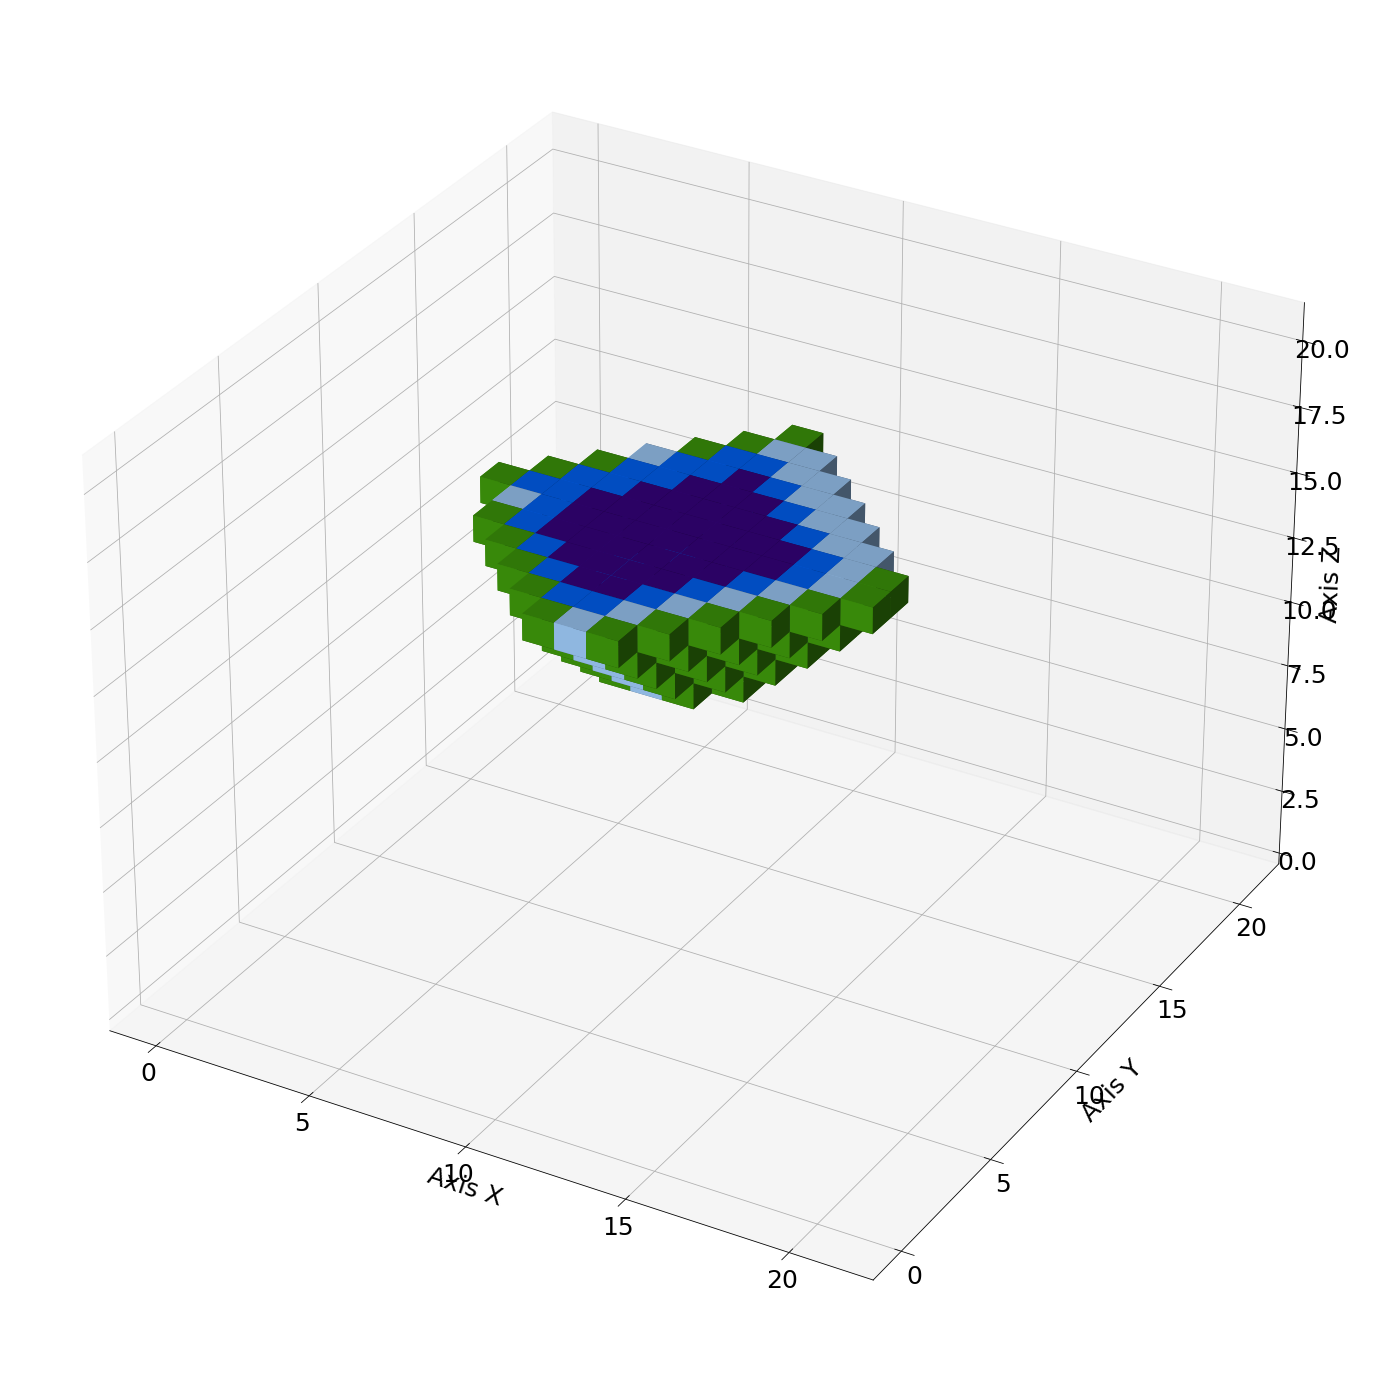

In [2]:
path = "C:/Users/Williams/Desktop/Tesis Magister/Magister/ThesisCode/MainCode/Databases/integratedModel/"
undergroundDatabaseName = 'Modelo_F_OG.xlsx'
openPitDatabaseName = 'Modelo_F_OG_4_4_4.xlsx'
main = Main(path, undergroundDatabaseName, openPitDatabaseName)
main.execute()

In [5]:
params= [main.t_C,  
        main.RMu_t,
        main.RMl_t, 
        main.RPu_t,
        main.RPl_t,
        main.qu_t,  
        main.ql_t,  

        #Underground Parameters
        main.t_S,  
        main.MU_mt,
        main.ML_mt,
        main.MU_pt,
        main.ML_pt,
        main.qU_dt,
        main.qL_dt,
        main.A_d,  
        main.NU_nt,
        main.NL_nt,
        main.N_t,  
        main.RL_dt,
        main.RU_dt]

In [6]:
params

[{0: 1, 1: 2, 2: 3, 3: 4},
 {0: 13219200.0, 1: 13219200.0, 2: 13219200.0, 3: 13219200.0},
 {0: 8812800.0, 1: 8812800.0, 2: 8812800.0, 3: 8812800.0},
 {0: 10933380.0, 1: 10933380.0, 2: 10933380.0, 3: 10933380.0},
 {0: 7288920.0, 1: 7288920.0, 2: 7288920.0, 3: 7288920.0},
 {0: 1, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0},
 {0: 1, 1: 2, 2: 3, 3: 4},
 {0: 25806600.0, 1: 25806600.0, 2: 25806600.0, 3: 25806600.0},
 {0: 17204400.0, 1: 17204400.0, 2: 17204400.0, 3: 17204400.0},
 {0: 17777880.0, 1: 17777880.0, 2: 17777880.0, 3: 17777880.0},
 {0: 11851920.0, 1: 11851920.0, 2: 11851920.0, 3: 11851920.0},
 {0: 1, 1: 1, 2: 1, 3: 1},
 {0: 0, 1: 0, 2: 0, 3: 0},
 {0: 2, 1: 2, 2: 2, 3: 2},
 {0: 59, 1: 59, 2: 59, 3: 59},
 {0: 32, 1: 32, 2: 32, 3: 32},
 {0: 57, 1: 114, 2: 171, 3: 228},
 {0: 0.3, 1: 0.3, 2: 0.3, 3: 0.3},
 {0: 0.7, 1: 0.7, 2: 0.7, 3: 0.7}]